# Problem Statement:
# Task 1: Linear regression.To 
Fit a predictive linear regression model to estimatethe  weight of the fish from its length, height, andthe 
width? (the data sourcis e fish.ced).Observe the coefficientnts values by using the standard Least Square Estimates.To find the standard error of the estimated coefficients, R-squared teed term.ed term.

# Task 2: Ridge and Lasso Regression
• Fit the Ridge and Lasso Regression Models
• Oberve the coefficients for Ridge and Lasso Regression models and the error of the
estimated coefficients, R-squared term.

# STEP1: Load and Explore the Data

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the dataset
data = pd.read_csv(r"C:\Users\achan\Desktop\Machine Learning Course materials\Assignments\Assignment-1\Fish.csv")

# Display the first few rows of the dataset
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# STEP2: To fit Linear Regression Model

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Prepare the data
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = data['Weight']


# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Coefficients (Beta values)
coefficients = model.params

print("Coefficients:", coefficients)


Coefficients: const     -499.586955
Length1     62.355214
Length2     -6.526752
Length3    -29.026219
Height      28.297351
Width       22.473307
dtype: float64


The regression model reveals that fish weight is positively influenced by Length1, Height, and Width, with coefficients of 62.36, 28.30, and 22.47, respectively, indicating that increases in these measurements correspond to increases in fish weight. Conversely, Length2 and Length3 have a negative impact on weight, with coefficients of -6.53 and -29.03, suggesting that increases in these dimensions lead to a decrease in fish weight. The intercept of -499.59 represents the expected weight when all predictors are zero, though this value is primarily for model fitting rather than practical interpretation. These results highlight the varying effects of different measurements on fish weight and provide a basis for further analysis and practical application.

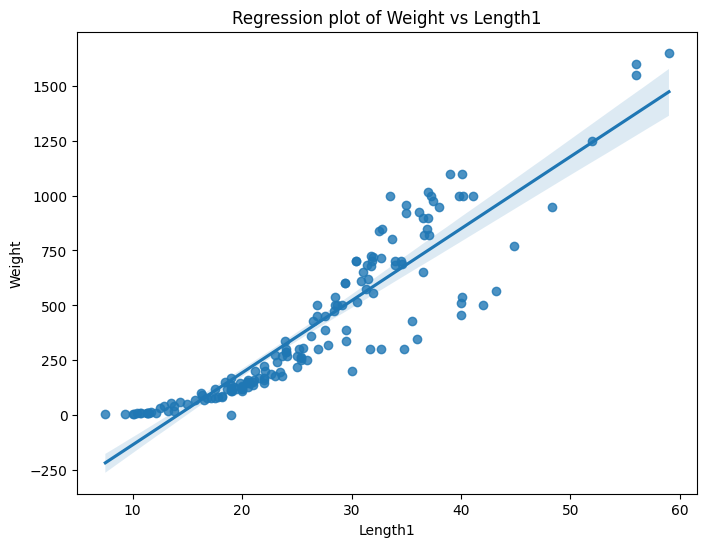

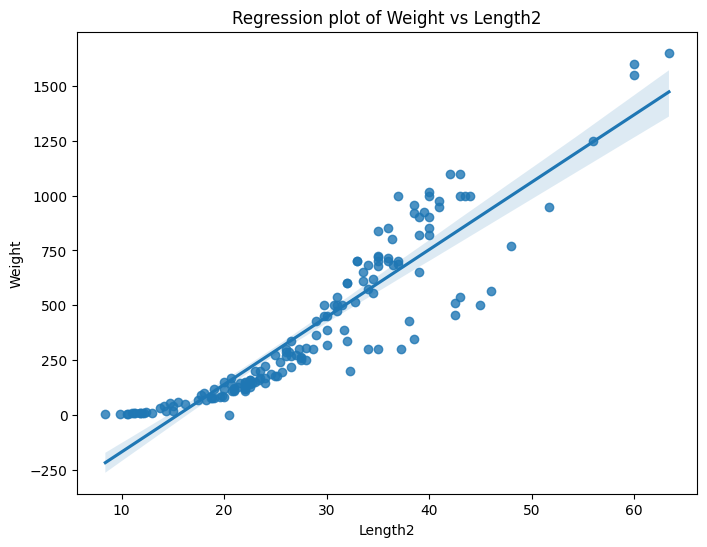

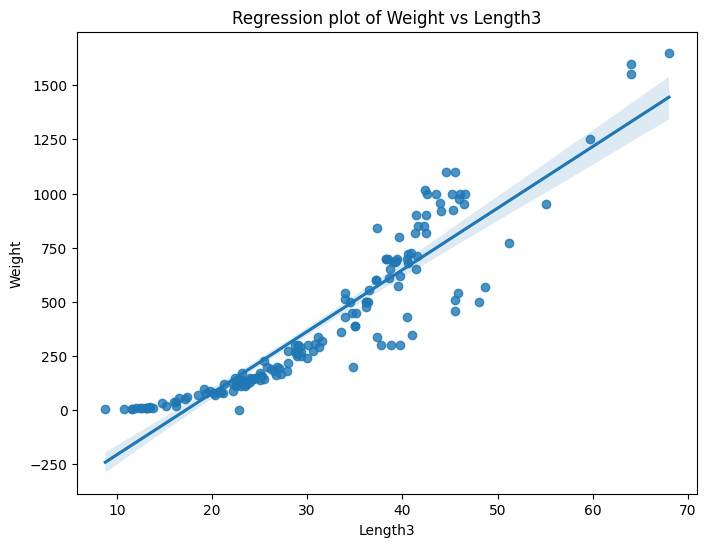

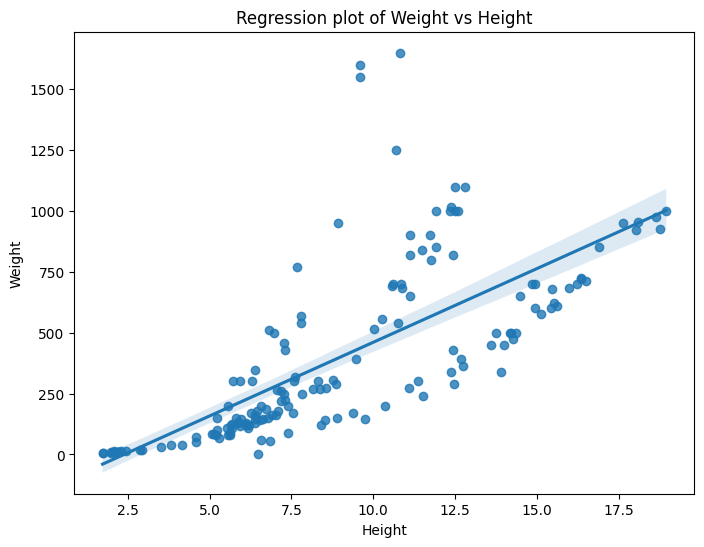

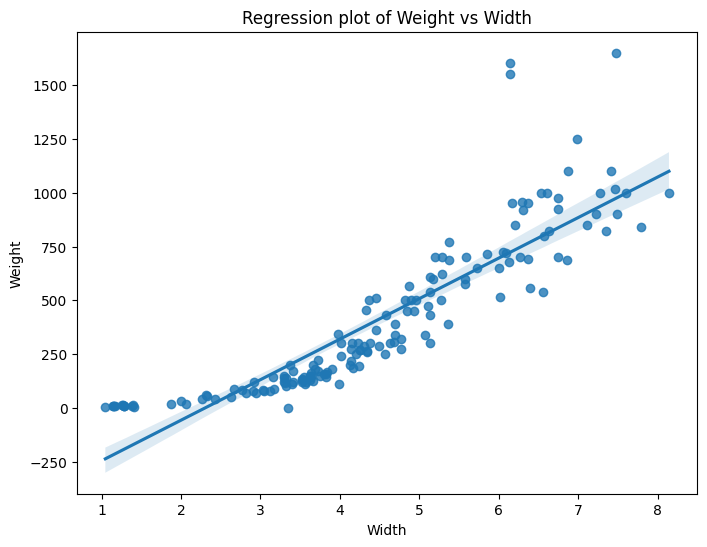

In [47]:
# Function to plot scatter plot with regression line
def plot_regression(x, y, xlabel, ylabel):
    plt.figure(figsize=(8, 6 ))
    sns.regplot(x=x, y=y, data=data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Regression plot of {ylabel} vs {xlabel}')
    plt.show()

# Plot for Length1 vs Weight
plot_regression('Length1', 'Weight', 'Length1', 'Weight')

# Plot for Length2 vs Weight
plot_regression('Length2', 'Weight', 'Length2', 'Weight')

# Plot for Length3 vs Weight
plot_regression('Length3', 'Weight', 'Length3', 'Weight')

# Plot for Height vs Weight
plot_regression('Height', 'Weight', 'Height', 'Weight')

# Plot for Width vs Weight
plot_regression('Width', 'Weight', 'Width', 'Weight')


# STEP3: Calculate the Standard Error and R-squared 

In [48]:
import statsmodels.api as sm
# Extract the coefficients, standard errors, and R-squared term
coefficients = model.params
standard_errors = model.bse
r_squared = model.rsquared

print("Coefficients:", coefficients)
print("Standard Errors:", standard_errors)
print("R-squared:", r_squared)


Coefficients: const     -499.586955
Length1     62.355214
Length2     -6.526752
Length3    -29.026219
Height      28.297351
Width       22.473307
dtype: float64
Standard Errors: const      29.572240
Length1    40.208739
Length2    41.758761
Length3    17.352958
Height      8.729226
Width      20.371733
dtype: float64
R-squared: 0.8852867046546207


The regression analysis shows that it is a strong model fit with an R-squared value of 0.885, indicating that approximately 88.5% of the variance in fish weight is explained by the predictors. The coefficients show that Length1, Height, and Width positively influence fish weight, with increases in these measurements corresponding to increases in weight. Conversely, Length2 and Length3 have a negative effect on weight. The standard errors suggest variability in the coefficient estimates, with Length1 and Length2 having higher standard errors compared to Height and Width, which might imply less precision in their estimates. Overall, the model provides a robust explanation of fish weight based on the included measurements, though some predictor estimates are less precise, as reflected by their standard errors.

# STEP4: Fit Ridge and Lasso Regression Models

In [49]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Length1', 'Length2', 'Length3', 'Height', 'Width']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_coefficients = ridge_model.coef_
ridge_r2 = r2_score(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_coefficients = lasso_model.coef_
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Ridge Coefficients:", ridge_coefficients)
print("Ridge R-squared:", ridge_r2)
print("Lasso Coefficients:", lasso_coefficients)
print("Lasso R-squared:", lasso_r2)


Ridge Coefficients: [125.67791143 104.26386279   1.65770961  45.05774489  79.15631264]
Ridge R-squared: 0.8765195085833241
Lasso Coefficients: [ 432.28448606    0.         -206.49295882   85.52010621   55.16220909]
Lasso R-squared: 0.881369287460949


C:\Users\achan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+04, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


The Ridge and Lasso regression analyses offer complementary insights into the relationship between fish measurements and weight. Ridge regression yields coefficients of [125.68, 104.26, 1.66, 45.06, 79.16] and an R-squared of 0.877, indicating a good fit with slight shrinkage of coefficients, which helps handle multicollinearity and keeps all predictors in the model. In contrast, Lasso regression results in coefficients of [432.28, 0.00, -206.49, 85.52, 55.16] with an R-squared of 0.881, showing that Lasso effectively performs feature selection by setting the coefficient for Length2 to zero, thus excluding it from the model. Both models provide strong fits, with Lasso slightly outperforming Ridge in explanatory power, while Ridge maintains coefficients for all predictors, reflecting its broader regularization approach.

# STEP5: Calculate the Standard Error for Ridge and Lasso

In [50]:
# Calculate the standard error for Ridge and Lasso
ridge_predictions_train = ridge_model.predict(X_train)
ridge_residuals = y_train - ridge_predictions_train
ridge_mse = mean_squared_error(y_train, ridge_predictions_train)
ridge_standard_error = np.sqrt(ridge_mse / (X_train.shape[0] - X_train.shape[1] - 1))

lasso_predictions_train = lasso_model.predict(X_train)
lasso_residuals = y_train - lasso_predictions_train
lasso_mse = mean_squared_error(y_train, lasso_predictions_train)
lasso_standard_error = np.sqrt(lasso_mse / (X_train.shape[0] - X_train.shape[1] - 1))

print("Ridge Standard Error:", ridge_standard_error)
print("Lasso Standard Error:", lasso_standard_error)


Ridge Standard Error: 10.96794677981257
Lasso Standard Error: 10.86855111565175


The standard errors for the Ridge and Lasso regression models are both close, with Ridge at 10.97 and Lasso at 10.87, indicating similar levels of precision in their coefficient estimates. These comparable standard errors suggest that both regularization techniques provide robust and stable estimates for the predictors. Ridge's slightly higher standard error reflects its broader regularization approach, which may introduce more variability, while Lasso's slightly lower standard error is consistent with its feature selection that simplifies the model. Overall, the standard errors indicate that both models effectively manage prediction uncertainty while maintaining a strong fit to the data.